<a href="https://colab.research.google.com/github/adiebagus1704/PCVK_Genap_2021/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

#akses google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


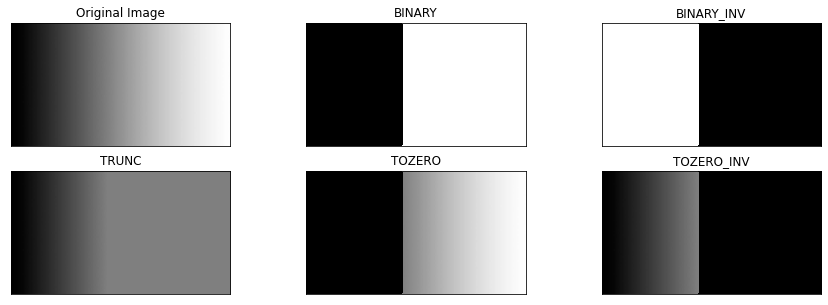

In [2]:
#No.3

import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/Images/gradient.jpg')
img = cv2.imread(filename) 
thresh1 = cv2.imread(filename) 
thresh2 = cv2.imread(filename) 
thresh3 = cv2.imread(filename) 
thresh4 = cv2.imread(filename) 
thresh5 = cv2.imread(filename) 
thresh = 127    


thresh1[img>thresh] = 255           
thresh1[img<=thresh] = 0

thresh2 = 255 - thresh1            


thresh3[img>thresh] = thresh        


thresh4[img<=thresh] = 0            
        

thresh5[img>thresh] = 0             

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV'] 
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


plt.figure(figsize = (15,5)) 
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([]) 
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


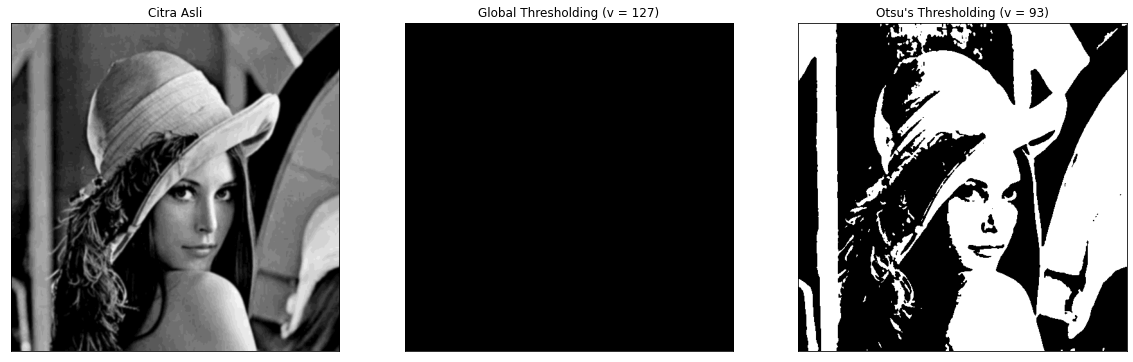

In [4]:
#No.4

import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/Images/lena_gs_lc2.jpg')
img = cv2.imread(filename,0) 
blur = cv2. GaussianBlur (img, (5,5),0)

hist = cv2.calcHist([blur],[0],None,[256], [0,256]) 
hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,255):
  wb += hist[i] 
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*hist[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x] 
citra3 = [blur, th1, th2]

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

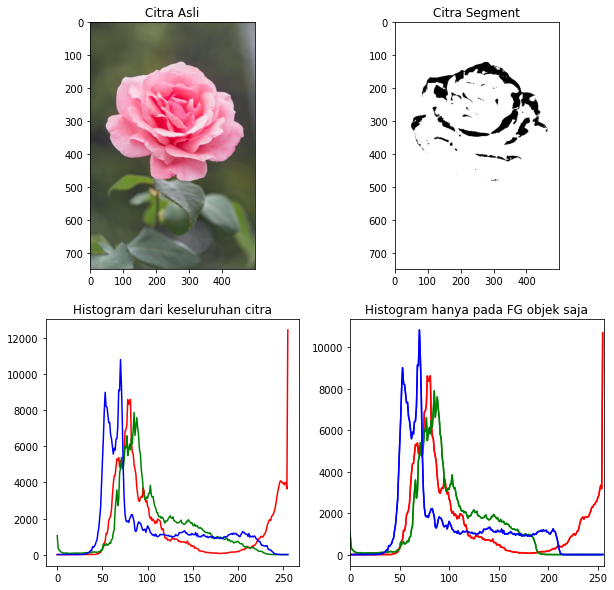

In [5]:
#No.5

import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/Images/rose_pink.png')

img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()



(<matplotlib.axes._subplots.AxesSubplot at 0x7f8acd35cf50>,
 <matplotlib.image.AxesImage at 0x7f8acd2ccfd0>)

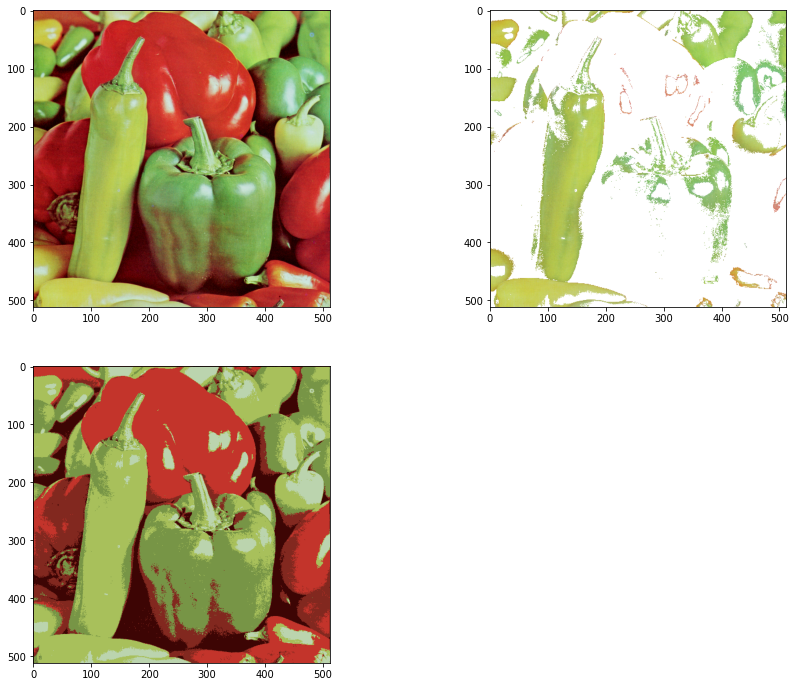

In [6]:
#No.6

import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/Images/peppers.tiff')

img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


pixel_values = img.reshape((-1, 3)) 

pixel_values = np.float32(pixel_values)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)


k = 6 
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)


labels = labels.flatten()


segmented_image = centers[labels.flatten()] 

segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img) 
masked_image0= masked_image.reshape((-1, 3)) 
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)


plt.figure(figsize = (15,12)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.subplot(2,2,2),plt.imshow(masked_image0) 
plt.subplot(2,2,3),plt.imshow(segmented_image)



Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi?

**JAWABAN**

untuk image ke 2 (kanan) mendapatkan hasil acak atau random atau gacha karena clusternya berubah-ubah mengikuti titik-titik cluster terdekat.